<a href="https://colab.research.google.com/github/PurraSujay/Computer-Vision-Projects/blob/main/object_detection_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Object Detection !**

#**Template Matching !**

In [43]:
import cv2


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

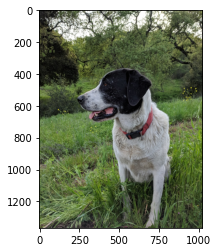

In [45]:
full = cv2.imread('sammy.jpg')
full =cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

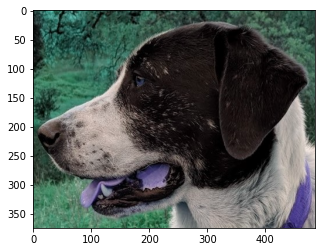

In [46]:
face = cv2.imread('sammy_face.jpg')
plt.imshow(face)

In [47]:
mystring = 'sum'
myfunc = eval(mystring) #----> eval function is used to convert string to list type formation  

In [48]:

full = cv2.imread('sammy.jpg')
full =cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

face = cv2.imread('sammy_face.jpg')
face =cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'CV2.TM_SQDIFF_NORMED']

#applying a test sample of templete matching !

In [49]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face, my_method)

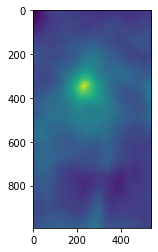

In [50]:
plt.imshow(res)

In [56]:
# The Full Image to Search
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

#the Above step is applying for all the diff types of Template Matching !

In [57]:
width , height , channel = face.shape

In [58]:
  width

375

In [59]:
height

486

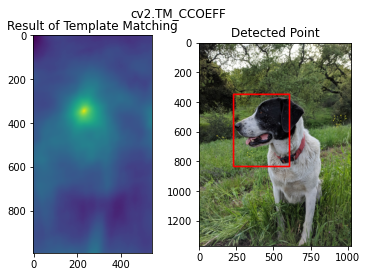

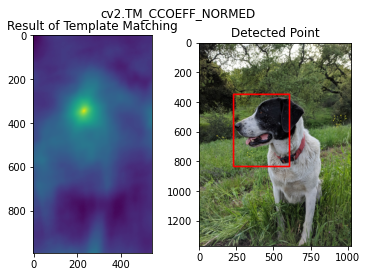

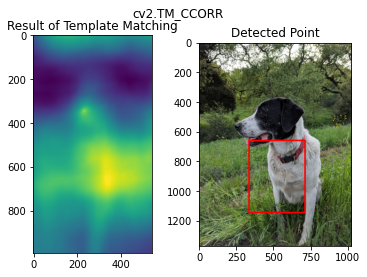

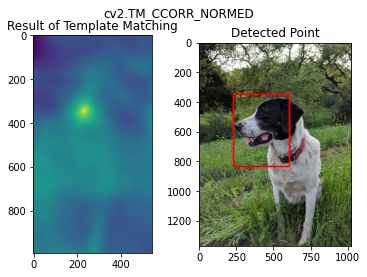

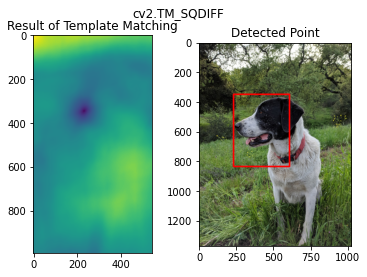

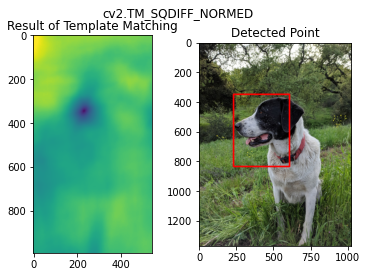

In [60]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc

    width , height , channel = face.shape
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

#**Corner Detection !**

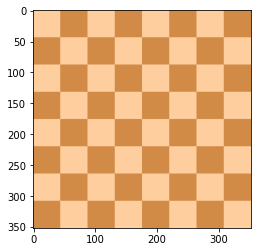

In [115]:
chess = cv2.imread('flat_chessboard.png')
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
plt.imshow(chess)

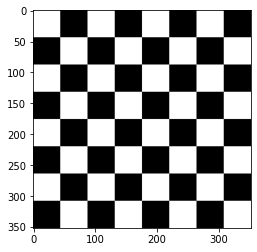

In [116]:
gray_chess = cv2.imread('flat_chessboard.png')
gray_chess = cv2.cvtColor(gray_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_chess, cmap='gray')

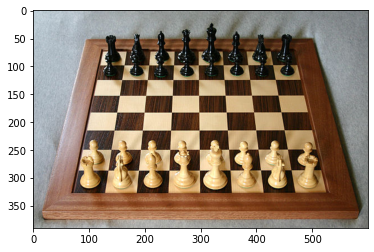

In [117]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess  = cv2.cvtColor(real_chess , cv2.COLOR_BGR2RGB)
plt.imshow(real_chess )

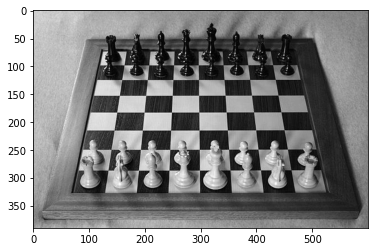

In [108]:
gray_real_chess  = cv2.cvtColor(real_chess , cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray' )

**Harris corner detection !**

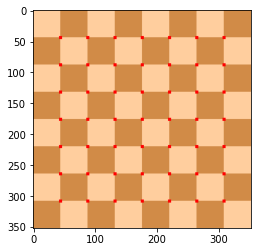

In [118]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(chess)

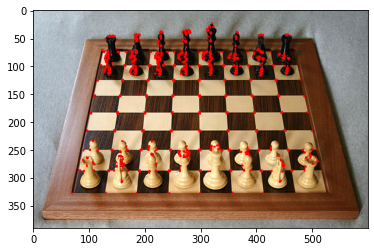

In [120]:
gary = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gary, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)

real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)


##**Shi-Tomasi Corner Detector & Good Features to Track Pape**

In [137]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

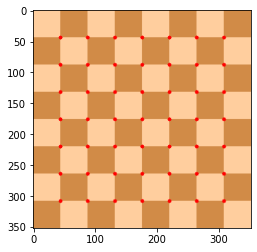

In [144]:
#5,0.01,10 are how many corners , quality level(goog default value is 0.01), min distane
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel() #ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

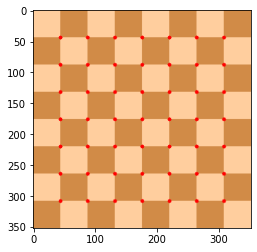

In [141]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10) #here i changed jow many corner value i.e 64
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

In [142]:

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

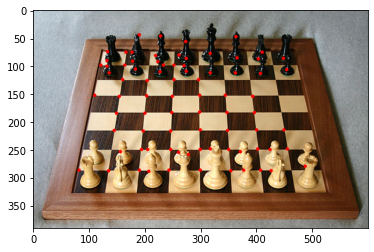

In [143]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)